In [69]:
%matplotlib inline
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')

In [70]:
stock_data = pd.read_csv("s&p.csv")

In [71]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [72]:
stock_data['Date']

0       2017-01-13
1       2017-01-12
2       2017-01-11
3       2017-01-10
4       2017-01-09
5       2017-01-06
6       2017-01-05
7       2017-01-04
8       2017-01-03
9       2016-12-30
10      2016-12-29
11      2016-12-28
12      2016-12-27
13      2016-12-23
14      2016-12-22
15      2016-12-21
16      2016-12-20
17      2016-12-19
18      2016-12-16
19      2016-12-15
20      2016-12-14
21      2016-12-13
22      2016-12-12
23      2016-12-09
24      2016-12-08
25      2016-12-07
26      2016-12-06
27      2016-12-05
28      2016-12-02
29      2016-12-01
           ...    
16838   1950-02-14
16839   1950-02-10
16840   1950-02-09
16841   1950-02-08
16842   1950-02-07
16843   1950-02-06
16844   1950-02-03
16845   1950-02-02
16846   1950-02-01
16847   1950-01-31
16848   1950-01-30
16849   1950-01-27
16850   1950-01-26
16851   1950-01-25
16852   1950-01-24
16853   1950-01-23
16854   1950-01-20
16855   1950-01-19
16856   1950-01-18
16857   1950-01-17
16858   1950-01-16
16859   1950

In [73]:
stock_data = stock_data.sort_values(by='Date')  
stock_data = stock_data.set_index('Date')


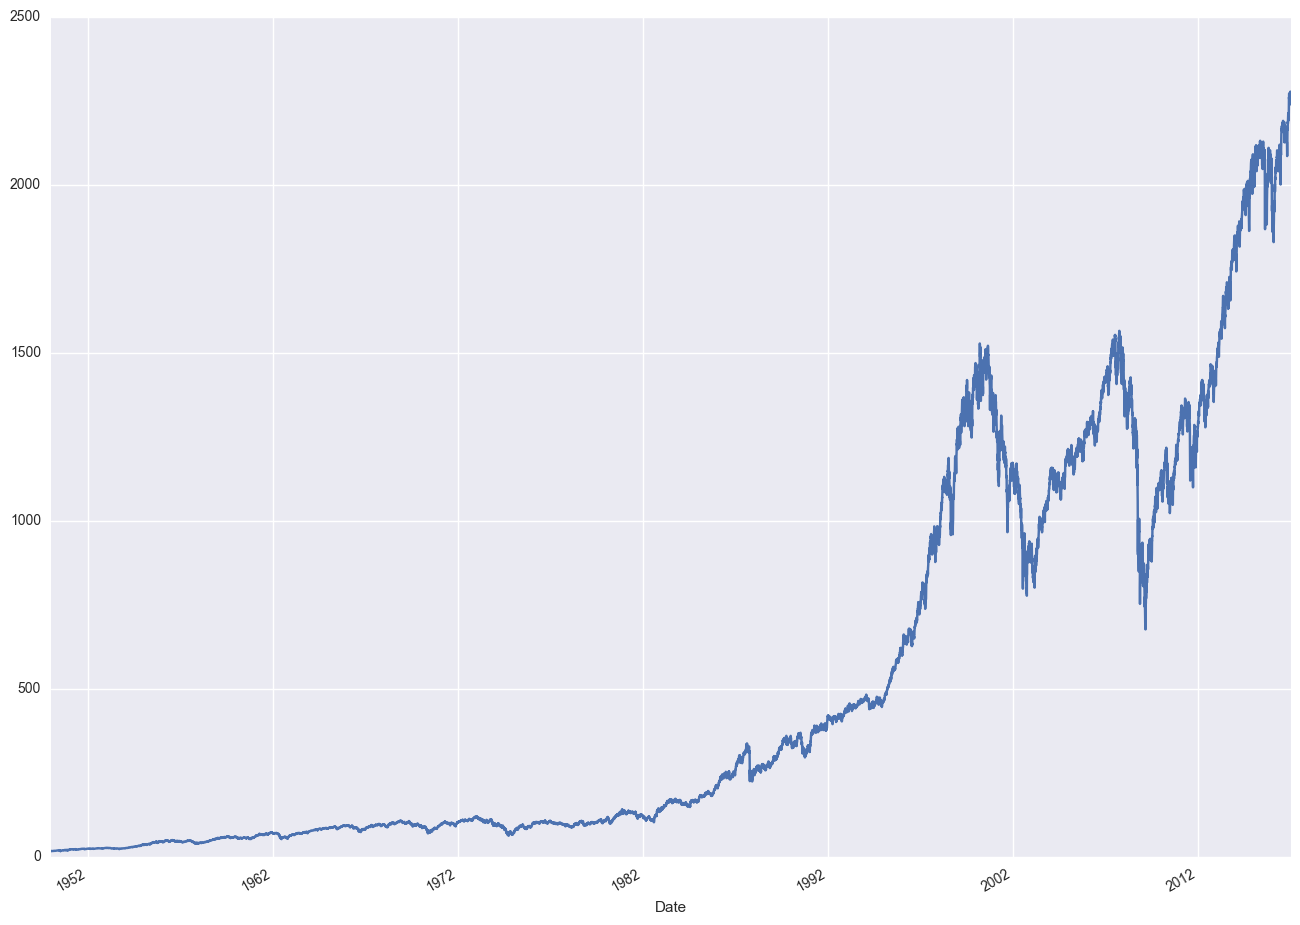

In [74]:
stock_data['Close'].plot(figsize=(16, 12))  


# The first obvious thing to note, aside from the two giant dips at the tail end corresponding to the market crashes in 2002 and 2008, is that the data is clearly non-stationary.

# The first thing we can try is a first difference of the series. In other words, subtract the previous value t-1 from the current value t to get the difference d(t)

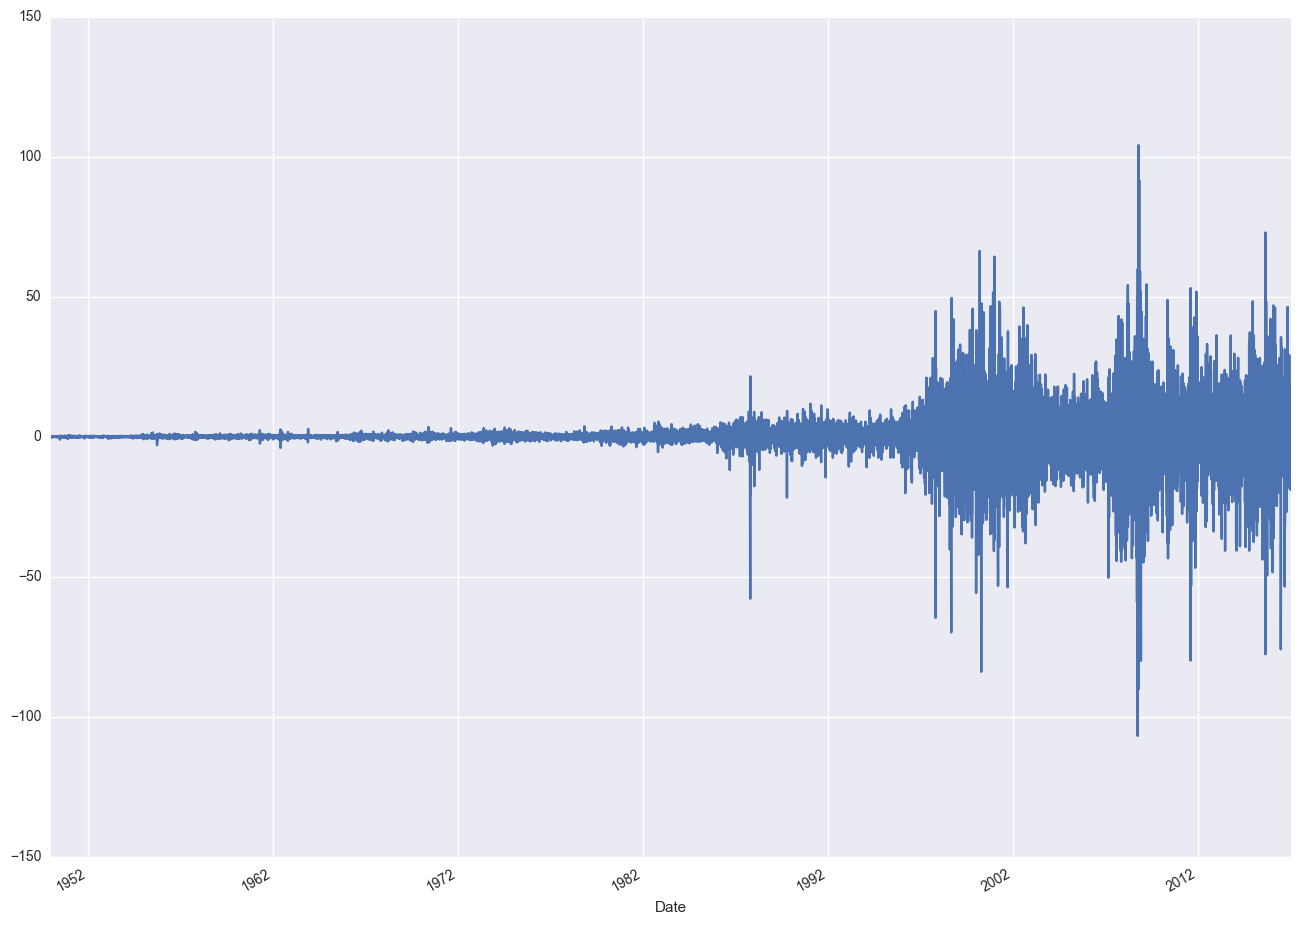

In [75]:
stock_data['First Difference'] = stock_data['Close'] - stock_data['Close'].shift()  
stock_data['First Difference'].plot(figsize=(16, 12))  


## The data no longer appears to be trending up over time and is instead centered around 0. There's another problem though. Look at the variance. It's very small early on and steadily increases over time. This is a sign that the data is not only non-stationary but also exponentially increasing.

### The magnitude of the day-to-day variations at present day completely dwarf the magnitude of the changes in 1950. To deal with this, we'll apply a log transform to the original series.

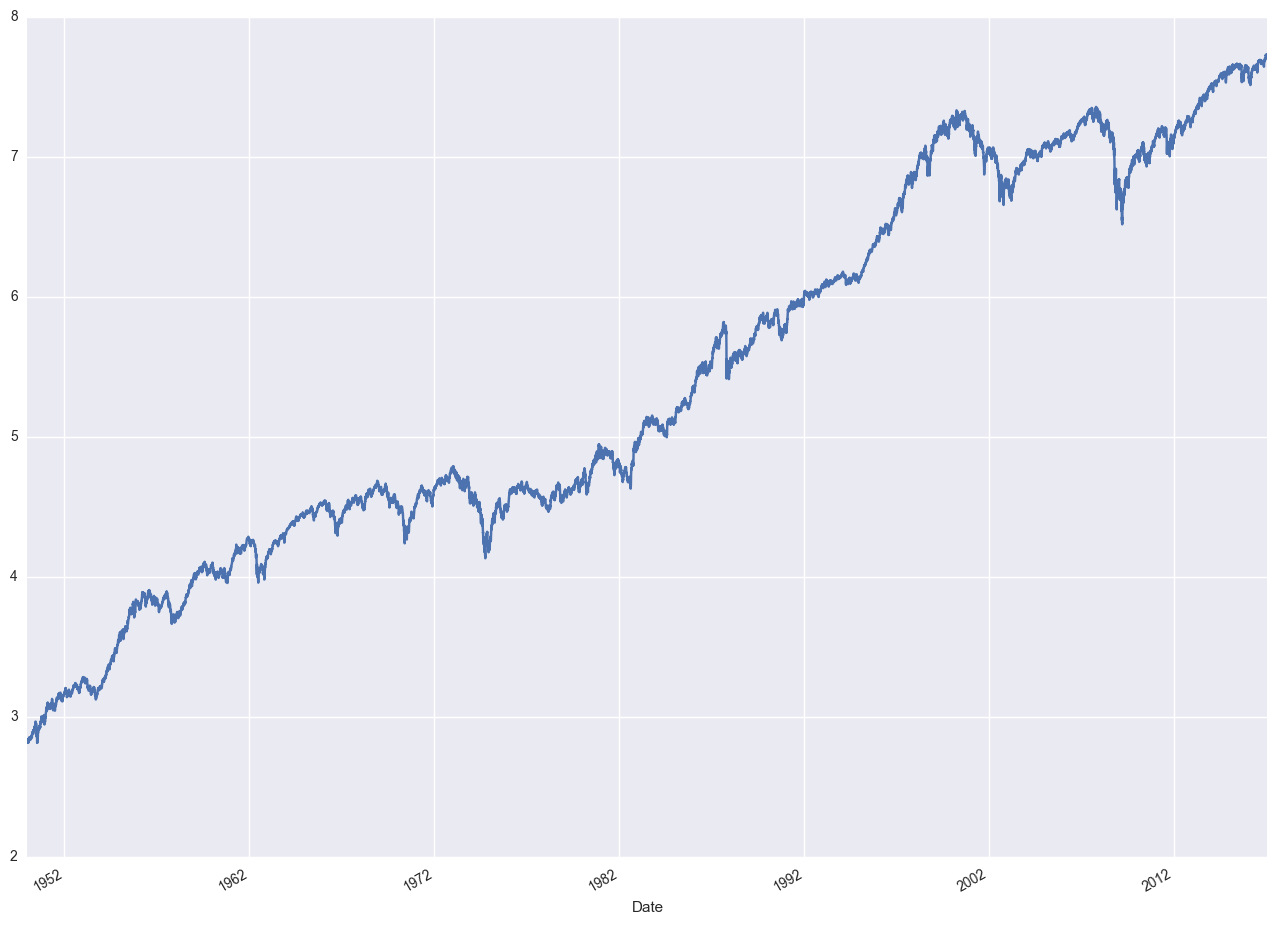

In [76]:
stock_data['Natural Log'] = stock_data['Close'].apply(lambda x: np.log(x))  
stock_data['Natural Log'].plot(figsize=(16, 12))  


## Now we can see the earlier variations in the data set quite a bit better than before. We still need to take the first difference though so let's calculate that from the logged series.



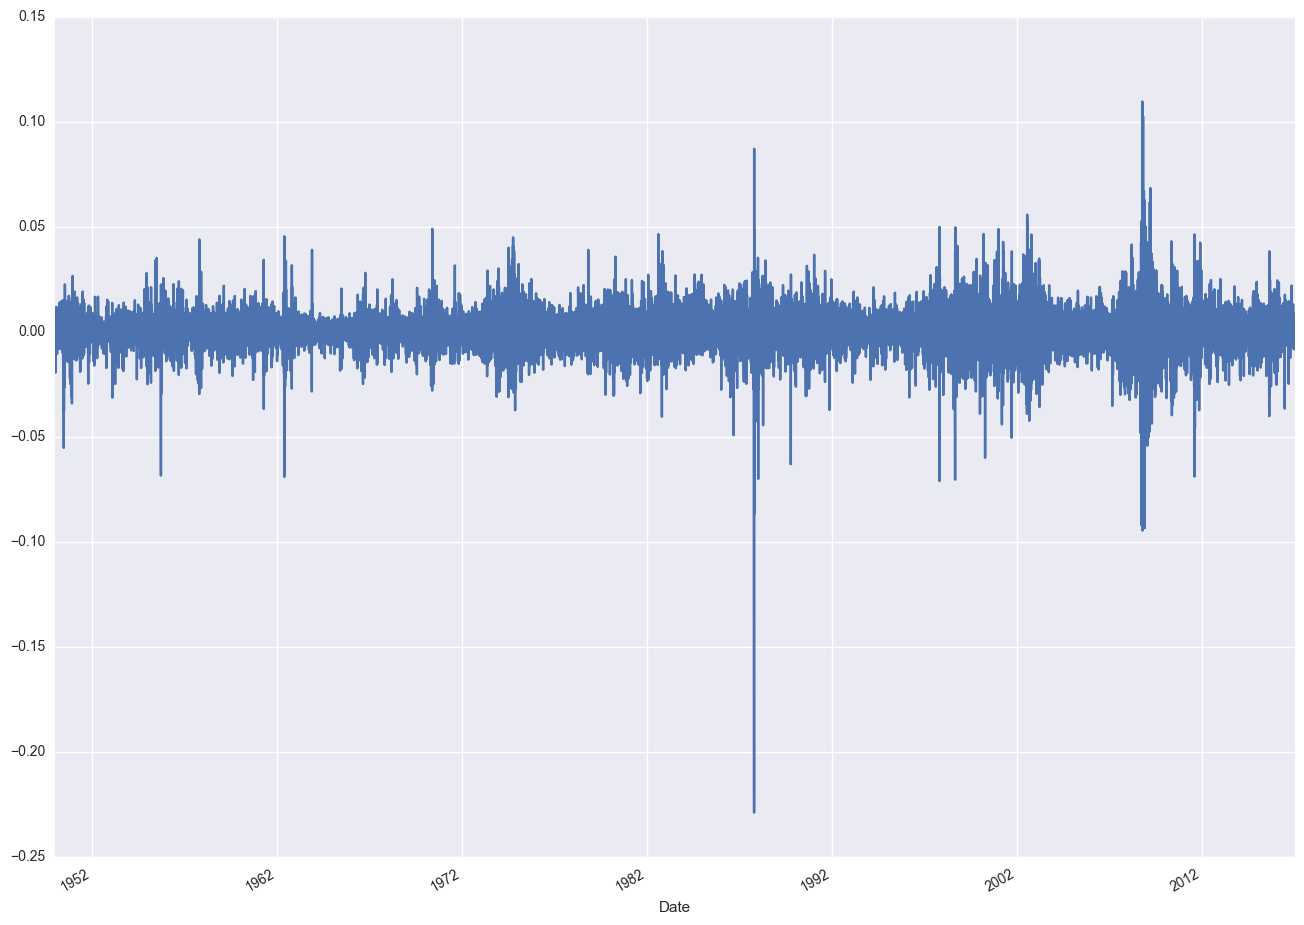

In [77]:
stock_data['Logged First Difference'] = stock_data['Natural Log'] - stock_data['Natural Log'].shift()  
stock_data['Logged First Difference'].plot(figsize=(16, 12))  


Now we have a stationary data series! This is cool! 
But what is stationarity? 

In [78]:
stock_data['Lag 1'] = stock_data['Logged First Difference'].shift()  
# stock_data['Lag 2'] = stock_data['Logged First Difference'].shift(2)  
# stock_data['Lag 5'] = stock_data['Logged First Difference'].shift(5)  
# stock_data['Lag 6'] = stock_data['Logged First Difference'].shift(365)  
sb.jointplot('Logged First Difference', 'Lag 1', stock_data, kind='reg', size=13)  



/Users/mircea/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


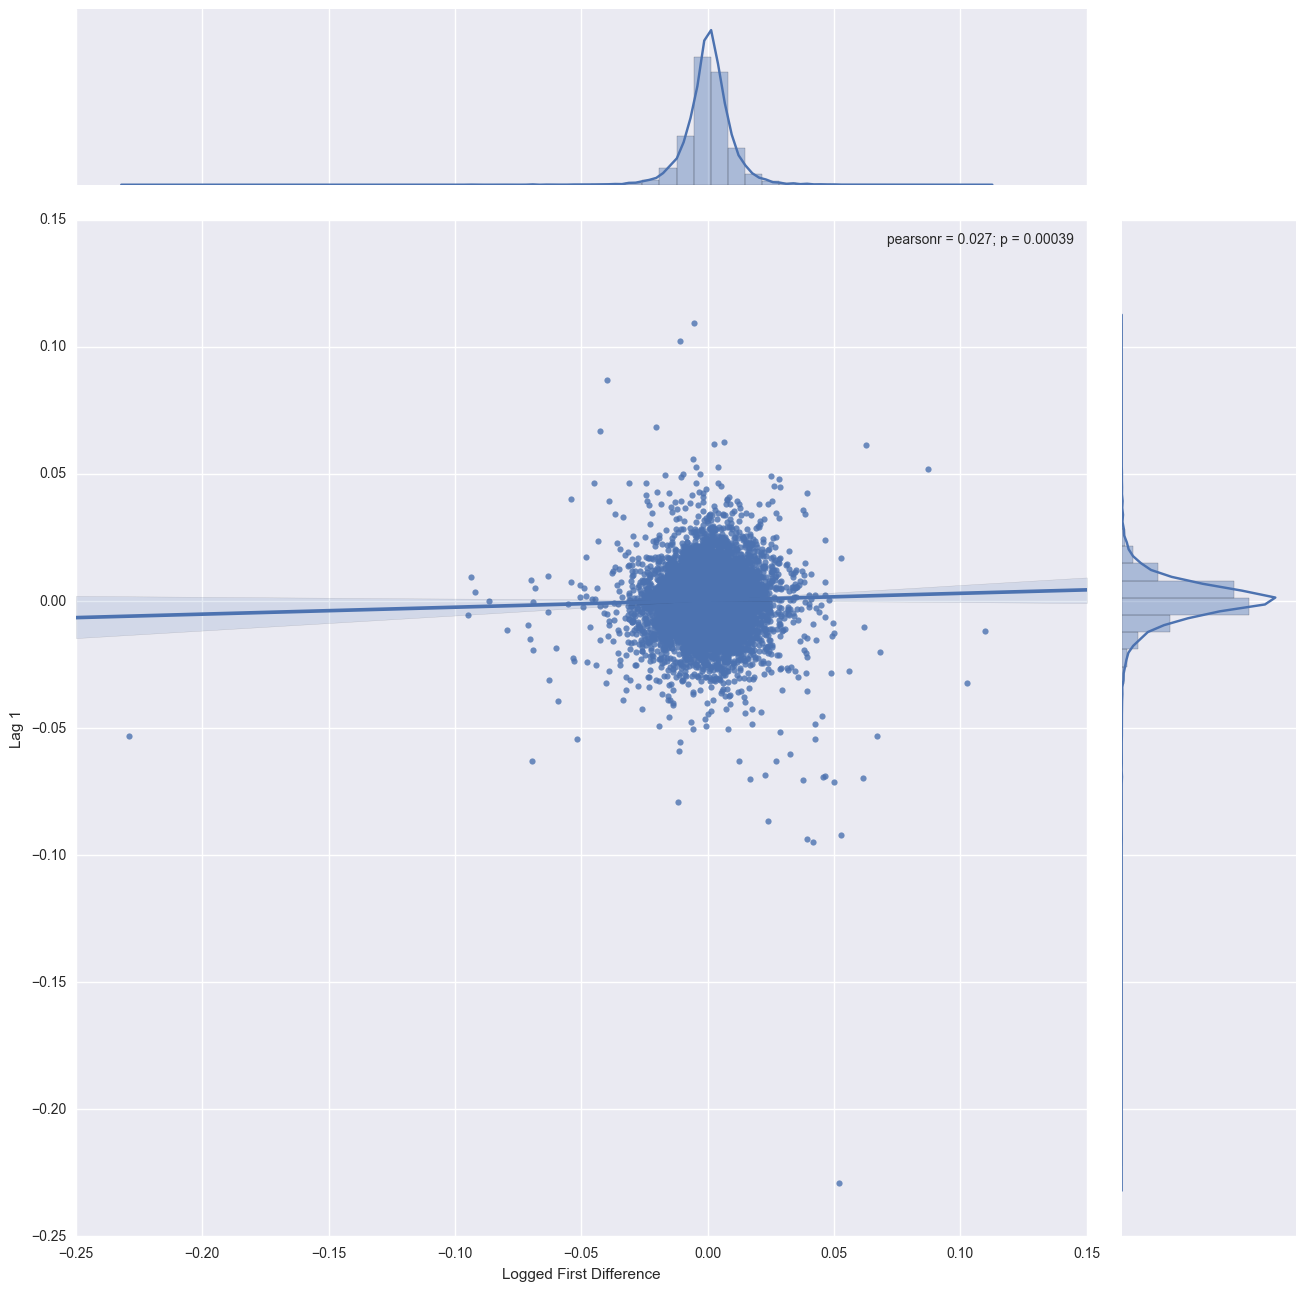

# There could be a relationship to other lag steps that we haven't tried, but it's impractical to test every possible lag value manually. Fortunately there is a class of functions that can systematically do this for us.



In [53]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(stock_data['Logged First Difference'].iloc[1:])  
lag_partial_correlations = pacf(stock_data['Logged First Difference'].iloc[1:])  


# The auto-correlation function computes the correlation between a variable and itself at each lag step up to some limit (in this case 40). The partial auto-correlation function computes the correlation at each lag step that is NOT already explained by previous, lower-order lag steps. 

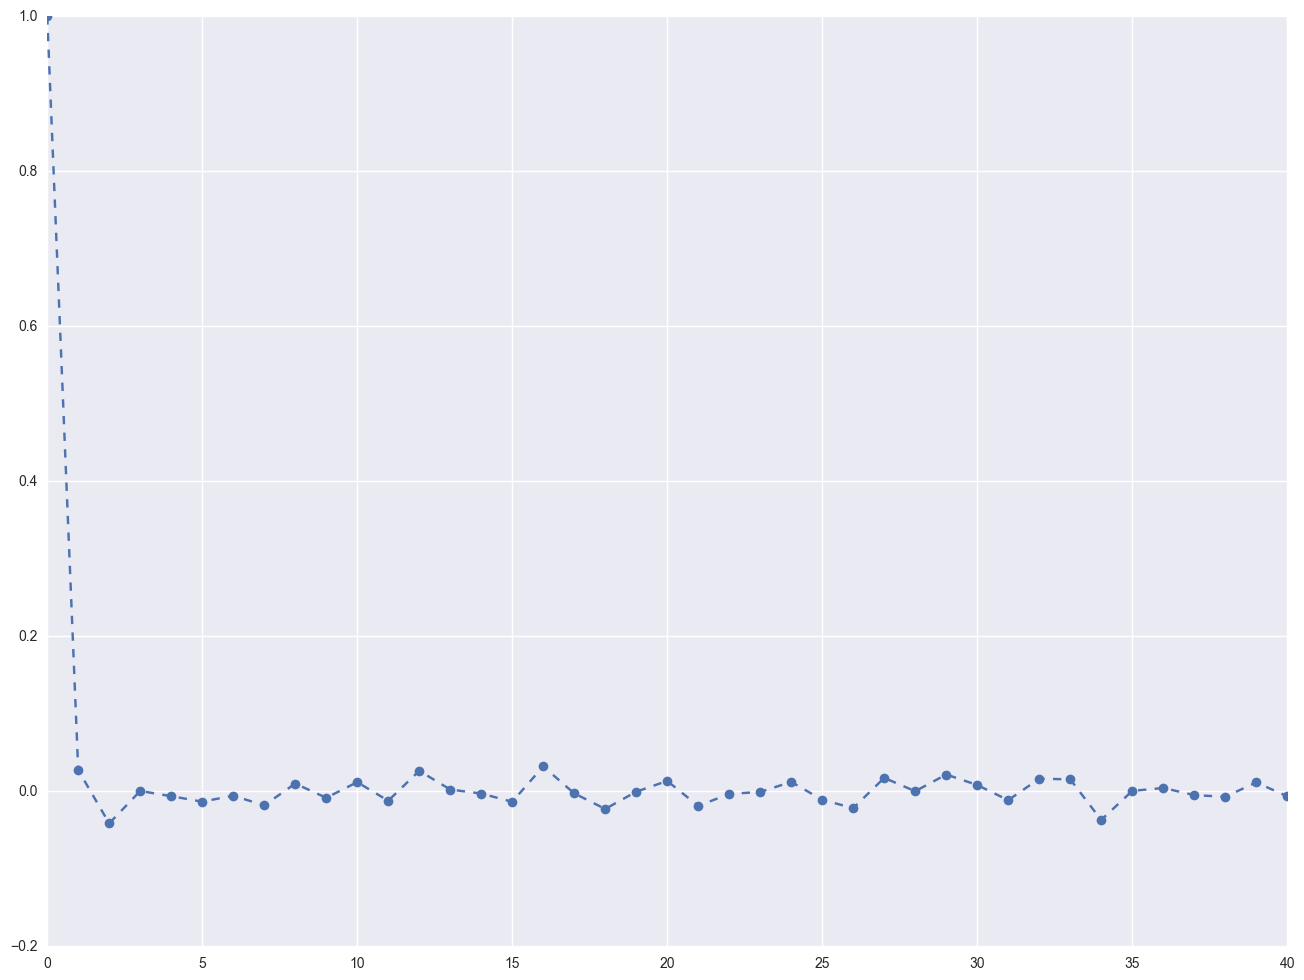

In [55]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')  

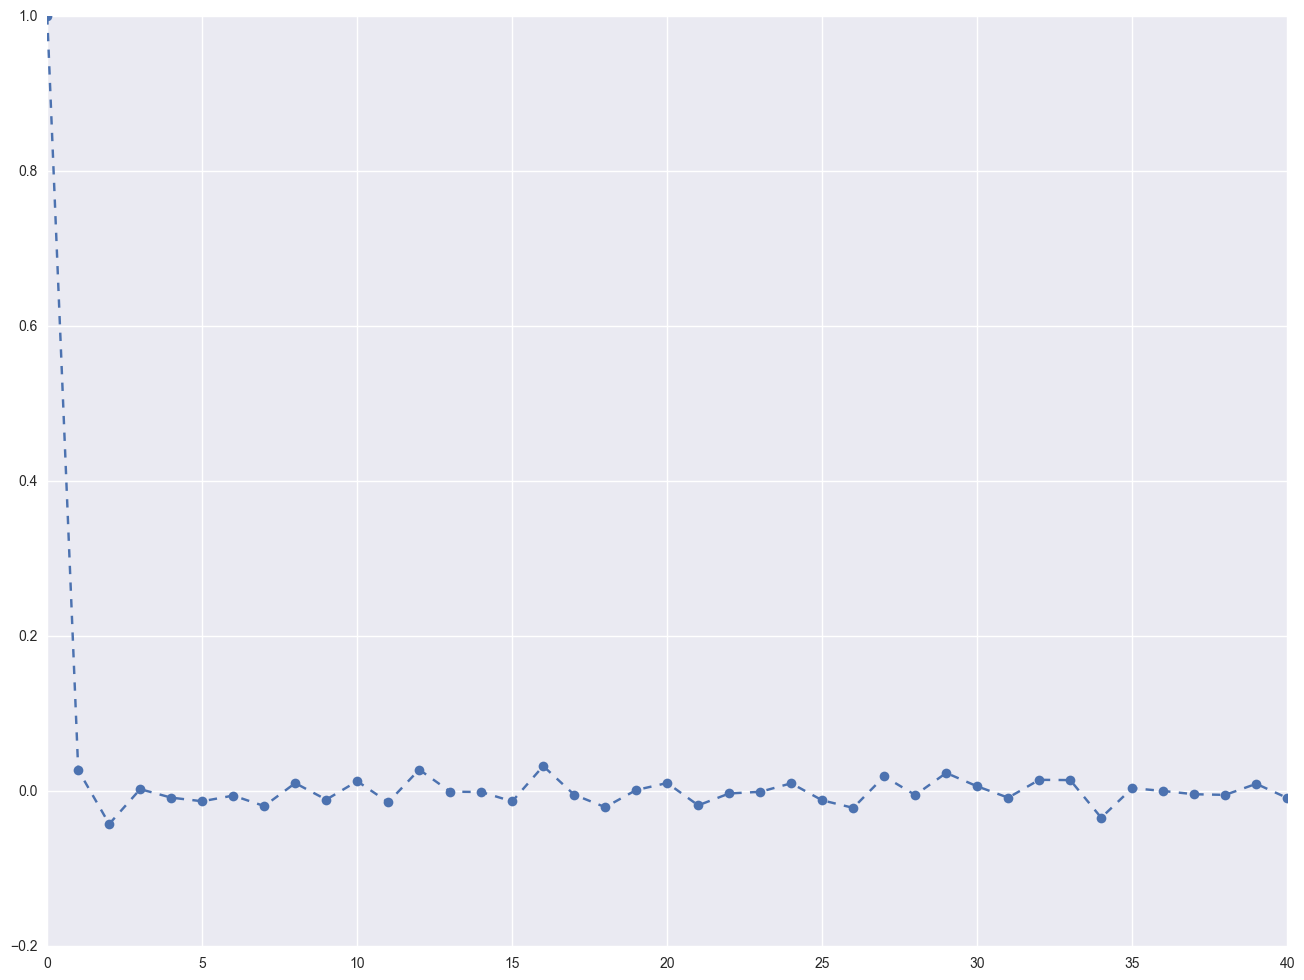

In [56]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_partial_correlations, marker='o', linestyle='--')  

# what about the other nice auto-correlation visualization? 


In [85]:
stock_data['Logged First Difference'].interpolate()

Date
1950-01-03         NaN
1950-01-04    0.011340
1950-01-05    0.004737
1950-01-06    0.002949
1950-01-09    0.005872
1950-01-10   -0.002932
1950-01-11    0.003517
1950-01-12   -0.019498
1950-01-13   -0.005384
1950-01-16    0.002995
1950-01-17    0.008338
1950-01-18   -0.000593
1950-01-19    0.001186
1950-01-20    0.001777
1950-01-23    0.001183
1950-01-24   -0.003552
1950-01-25   -0.007143
1950-01-26   -0.000598
1950-01-27    0.005365
1950-01-30    0.011820
1950-01-31    0.001761
1950-02-01    0.000000
1950-02-02    0.010502
1950-02-03    0.003476
1950-02-06    0.001734
1950-02-07   -0.005210
1950-02-08   -0.001161
1950-02-09    0.004059
1950-02-10   -0.002318
1950-02-14   -0.010496
                ...   
2016-12-01   -0.003522
2016-12-02    0.000397
2016-12-05    0.005804
2016-12-06    0.003405
2016-12-07    0.013077
2016-12-08    0.002157
2016-12-09    0.005921
2016-12-12   -0.001138
2016-12-13    0.006518
2016-12-14   -0.008150
2016-12-15    0.003876
2016-12-16   -0.001752
2016-1

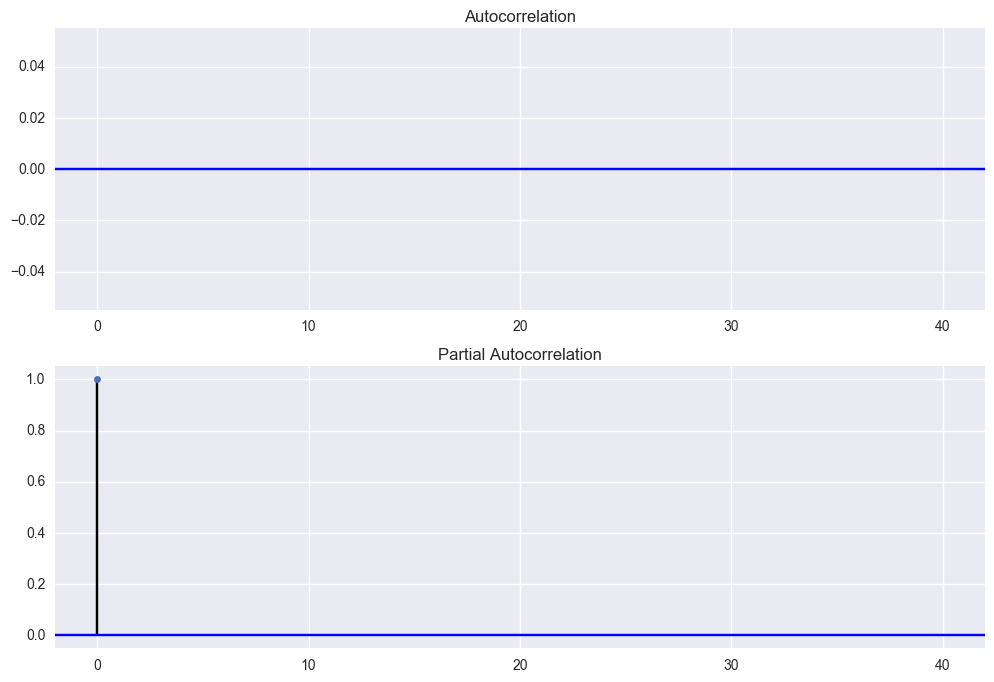

In [89]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(stock_data['Lag 1'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(stock_data['Lag 1'], lags=40, ax=ax2)


/Users/mircea/anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


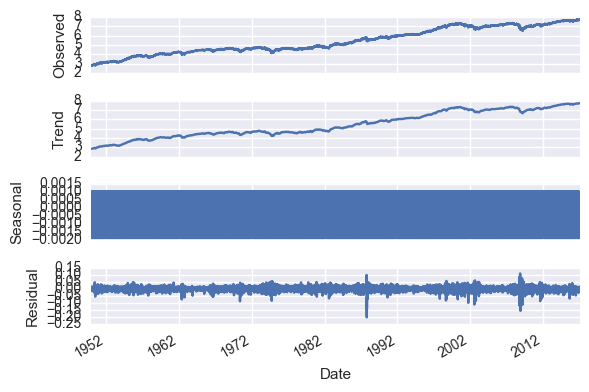

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock_data['Natural Log'], model='additive', freq=30)  
fig = plt.figure()  
fig = decomposition.plot()  


# there is no seasonal variation in the data, so there's not much to see; if on the other hand we look at CO2 data... then we can see a clear trend!

/Users/mircea/anaconda/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


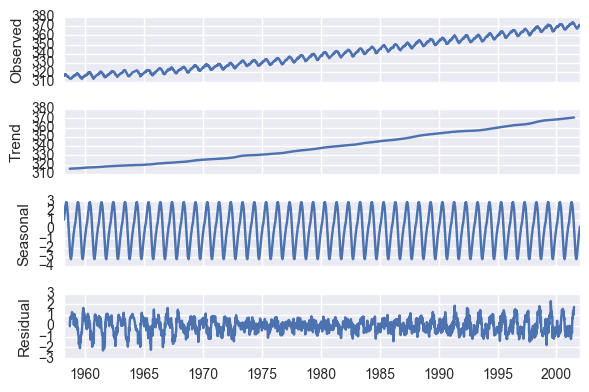

In [59]:
co2_data = sm.datasets.co2.load_pandas().data  
co2_data.co2.interpolate(inplace=True)  
result = sm.tsa.seasonal_decompose(co2_data.co2)  
fig = plt.figure()  
fig = result.plot()  
